In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load transactions dataset
df_transacoes = pd.read_csv('../banvic/seeds/banvic/transacoes.csv')
print(f"✅ Loaded {len(df_transacoes):,} transaction records")

# Convert date column with proper timezone handling
df_transacoes['data_transacao'] = pd.to_datetime(df_transacoes['data_transacao'], format='mixed')
print("✅ Date column converted successfully")


✅ Loaded 71,999 transaction records
✅ Date column converted successfully


# Análise Descritiva - Transações

In [3]:
print("\n💳 TRANSAÇÕES ANALYSIS")
print("=" * 50)

# Basic info
print("📋 Basic Information:")
print(f"   - Total transactions: {len(df_transacoes):,}")
print(f"   - Columns: {list(df_transacoes.columns)}")
print(f"   - Missing values: {df_transacoes.isnull().sum().sum()}")

# Transaction types
print(f"\n🏷️ Transaction Types:")
print(df_transacoes['nome_transacao'].value_counts())

# Financial analysis
print(f"\n💰 Financial Analysis:")
print(f"   - Total transaction volume: R$ {df_transacoes['valor_transacao'].sum():,.2f}")
print(f"   - Average transaction value: R$ {df_transacoes['valor_transacao'].mean():,.2f}")
print(f"   - Transaction value range: R$ {df_transacoes['valor_transacao'].min():,.2f} - R$ {df_transacoes['valor_transacao'].max():,.2f}")
print(f"   - Transaction value distribution:")
print(df_transacoes['valor_transacao'].describe())

# Timeline analysis
print(f"\n📅 Transaction Timeline:")
print(f"   - First transaction: {df_transacoes['data_transacao'].min()}")
print(f"   - Latest transaction: {df_transacoes['data_transacao'].max()}")
print(f"   - Transactions by year:")
print(df_transacoes['data_transacao'].dt.year.value_counts().sort_index())



💳 TRANSAÇÕES ANALYSIS
📋 Basic Information:
   - Total transactions: 71,999
   - Columns: ['cod_transacao', 'num_conta', 'data_transacao', 'nome_transacao', 'valor_transacao']
   - Missing values: 0

🏷️ Transaction Types:
nome_transacao
Compra Crédito                      24977
Compra Débito                       17662
Pix - Realizado                     13164
Pix - Recebido                       5134
Depósito em espécie                  4866
Saque                                2879
TED - Recebido                       1005
Pagamento de boleto                   452
Transferência entre CC - Crédito      441
Estorno de Debito                     403
DOC - Recebido                        402
Transferência entre CC - Débito       303
TED - Realizado                       130
DOC - Realizado                        91
Pix Saque                              90
Name: count, dtype: int64

💰 Financial Analysis:
   - Total transaction volume: R$ 25,705,454.40
   - Average transaction value: R$ 3

Devido ao elevado número de data points, essa demosntração foi feita por amostragem.

In [4]:
# Sample data for better performance (5,000 records)
df_sample = df_transacoes.sample(n=min(5000, len(df_transacoes)), random_state=42)

# Visualizações

## Valor de transações em R$ (amostra aleatória)

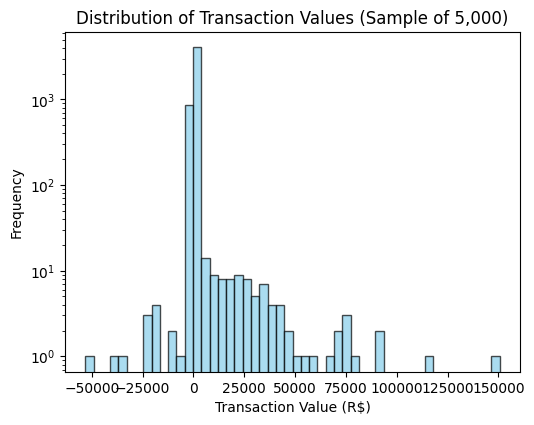

In [5]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
plt.hist(df_sample['valor_transacao'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Values (Sample of 5,000)')
plt.xlabel('Transaction Value (R$)')
plt.ylabel('Frequency')
plt.yscale('log')

## Tipo de transações

Text(0.5, 0, 'Count')

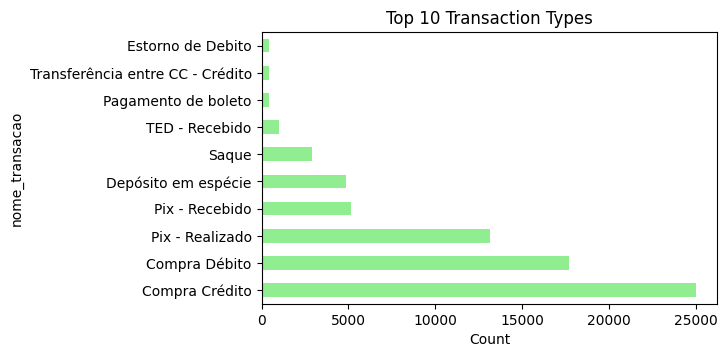

In [6]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 2)
df_transacoes['nome_transacao'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Transaction Types')
plt.xlabel('Count')

## Transações por tempo

Text(0, 0.5, 'Number of Transactions')

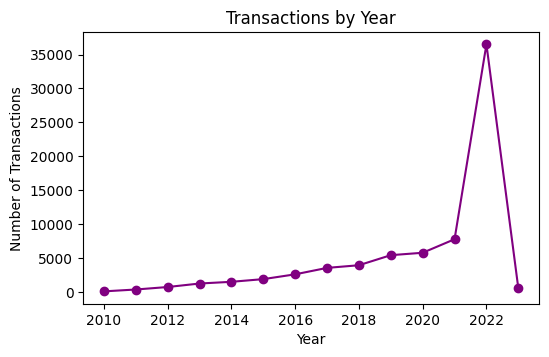

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 3)
df_transacoes['data_transacao'].dt.year.value_counts().sort_index().plot(kind='line', marker='o', color='purple')
plt.title('Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')

O pico de transações no final do ano de 2022 pode estar indicando um erro na coleta de dados.

## Volume de transações mensais

C:\Users\guizsantos\AppData\Local\Temp\ipykernel_12752\2870242695.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_trans = df_transacoes.groupby(df_transacoes['data_transacao'].dt.to_period('M'))['valor_transacao'].sum()


(array([492, 516, 540, 564, 588, 612, 636]),
 [Text(492, 0, '2011'),
  Text(516, 0, '2013'),
  Text(540, 0, '2015'),
  Text(564, 0, '2017'),
  Text(588, 0, '2019'),
  Text(612, 0, '2021'),
  Text(636, 0, '2023')])

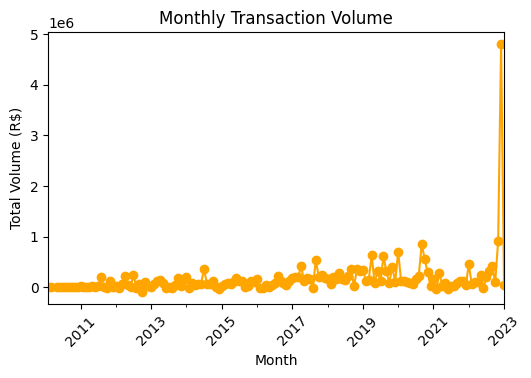

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 4)
monthly_trans = df_transacoes.groupby(df_transacoes['data_transacao'].dt.to_period('M'))['valor_transacao'].sum()
monthly_trans.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Total Volume (R$)')
plt.xticks(rotation=45)

## Número de transações diárias

(array([13879., 14610., 15340., 16071., 16801., 17532., 18262., 18993.,
        19723.]),
 [Text(13879.0, 0, '2008'),
  Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

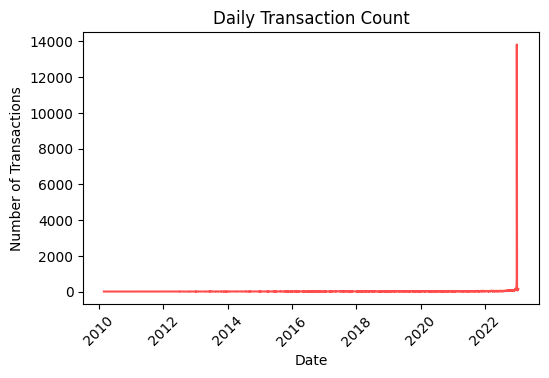

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 5)
daily_count = df_transacoes.groupby(df_transacoes['data_transacao'].dt.date).size()
daily_count.plot(kind='line', alpha=0.7, color='red')
plt.title('Daily Transaction Count')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

## Valor de transação por dia (amostragem aleatória)

(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

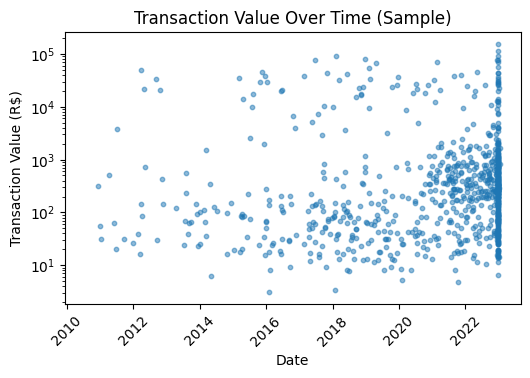

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 6)
plt.scatter(df_sample['data_transacao'], df_sample['valor_transacao'], alpha=0.5, s=10)
plt.title('Transaction Value Over Time (Sample)')
plt.xlabel('Date')
plt.ylabel('Transaction Value (R$)')
plt.yscale('log')
plt.xticks(rotation=45)

## Valor de transações por tipo de transação

Text(0.5, 0.98, '')

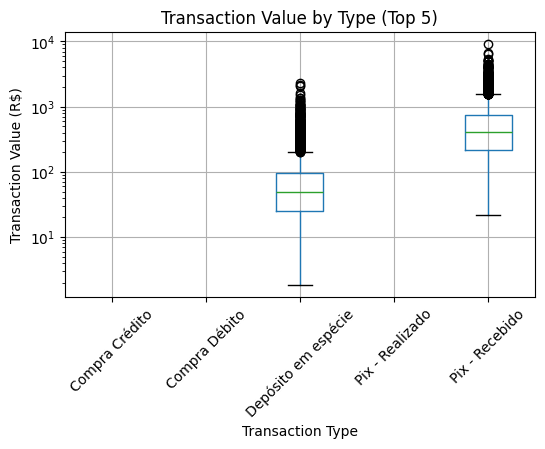

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 7)
top_types = df_transacoes['nome_transacao'].value_counts().head(5).index
df_top_types = df_transacoes[df_transacoes['nome_transacao'].isin(top_types)]
df_top_types.boxplot(column='valor_transacao', by='nome_transacao', ax=plt.gca())
plt.title('Transaction Value by Type (Top 5)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Value (R$)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.suptitle('')  # Remove default title

## Distribuição de transições por hora

Text(0, 0.5, 'Number of Transactions')

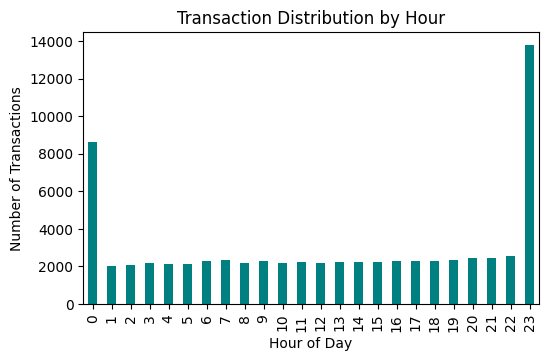

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 8)
df_transacoes['hora'] = df_transacoes['data_transacao'].dt.hour
df_transacoes['hora'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Transaction Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')

## Valor de transações por ano

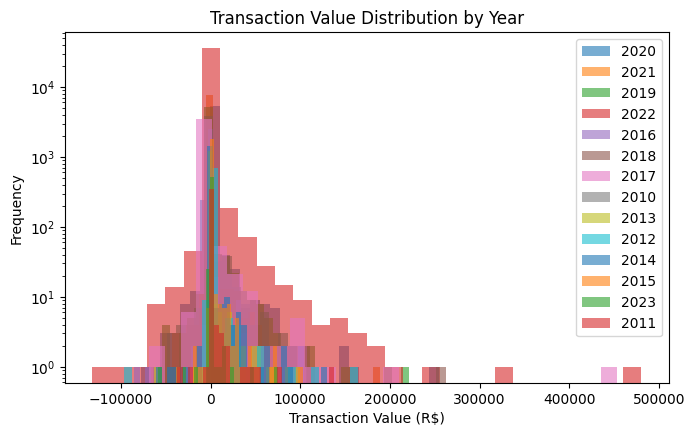

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 9)
for year in df_transacoes['data_transacao'].dt.year.unique():
    subset = df_transacoes[df_transacoes['data_transacao'].dt.year == year]
    plt.hist(subset['valor_transacao'], bins=30, alpha=0.6, label=str(year))
plt.title('Transaction Value Distribution by Year')
plt.xlabel('Transaction Value (R$)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()


## Resumo

In [14]:
# Summary statistics
print(f"\n📊 Summary Statistics:")
print(f"   - Total transaction volume: R$ {df_transacoes['valor_transacao'].sum():,.2f}")
print(f"   - Average transaction value: R$ {df_transacoes['valor_transacao'].mean():,.2f}")
print(f"   - Most common transaction type: {df_transacoes['nome_transacao'].value_counts().index[0]}")
print(f"   - Total unique accounts: {df_transacoes['num_conta'].nunique():,}")
print(f"   - Transaction value range: R$ {df_transacoes['valor_transacao'].min():,.2f} - R$ {df_transacoes['valor_transacao'].max():,.2f}")
print(f"   - Peak transaction hour: {df_transacoes['hora'].value_counts().index[0]}:00")
print(f"   - Transactions per day (average): {len(df_transacoes) / df_transacoes['data_transacao'].dt.date.nunique():.1f}")
print(f"   - Most active year: {df_transacoes['data_transacao'].dt.year.value_counts().index[0]} ({df_transacoes['data_transacao'].dt.year.value_counts().iloc[0]:,} transactions)")



📊 Summary Statistics:
   - Total transaction volume: R$ 25,705,454.40
   - Average transaction value: R$ 357.03
   - Most common transaction type: Compra Crédito
   - Total unique accounts: 999
   - Transaction value range: R$ -132,100.00 - R$ 480,270.00
   - Peak transaction hour: 23:00
   - Transactions per day (average): 17.9
   - Most active year: 2022 (36,506 transactions)
